# 🏠 California Housing Price Prediction using XGBoost

## 📄 Abstract
This mini project focuses on predicting house prices based on the California Housing dataset using XGBoost, a gradient boosting regression model. It includes preprocessing, exploratory data analysis, model training, evaluation, cross-validation, and hyperparameter tuning. The goal was to build a high-performing regression model and understand the impact of various features on housing prices.


<a href="https://colab.research.google.com/github/runeking2006/ml_project_hpp/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-n

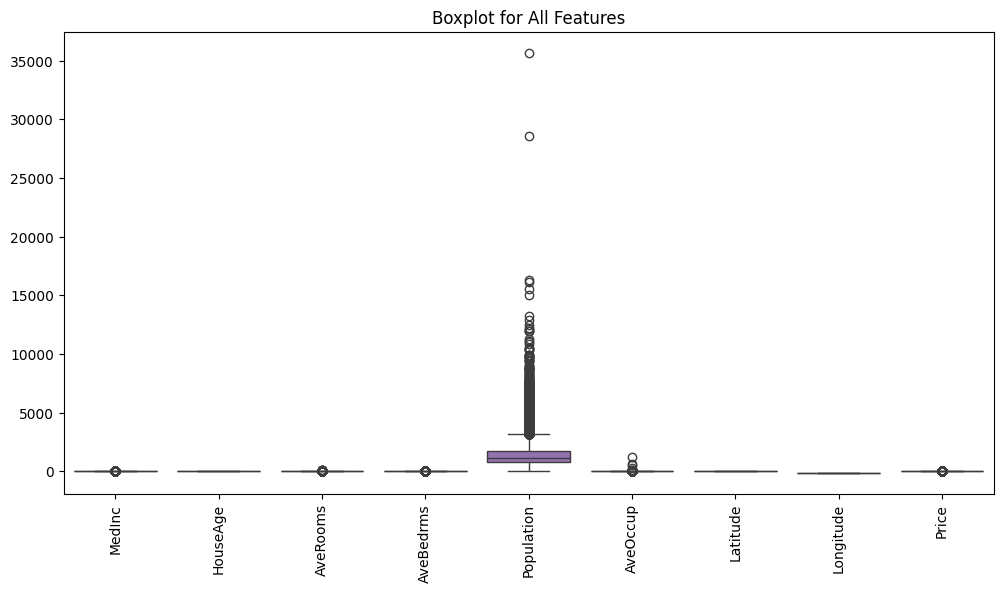

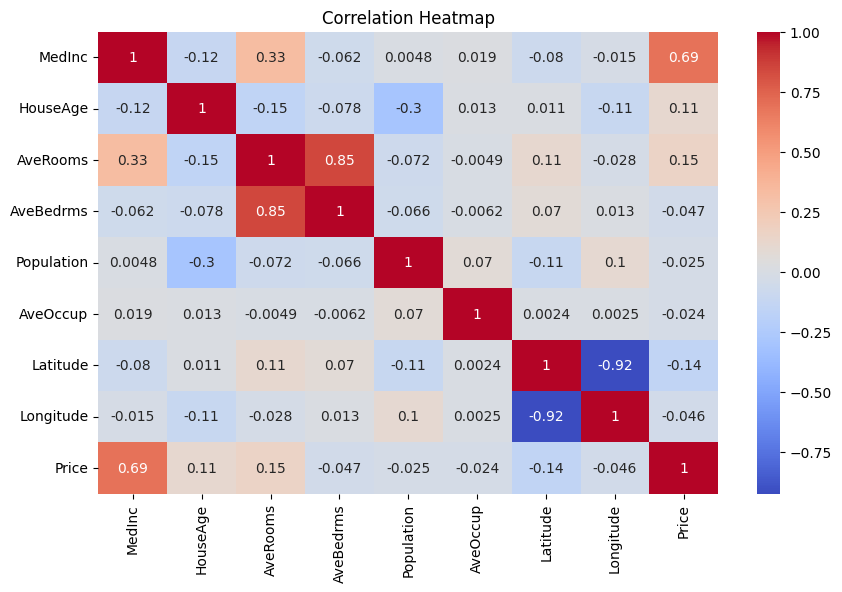


Model Evaluation Metrics:
MAE: 0.310
RMSE: 0.472
R² Score: 0.830

Average Cross-Validated MAE: 0.468
Fitting 3 folds for each of 27 candidates, totalling 81 fits

Best Hyperparameters from GridSearch:
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}


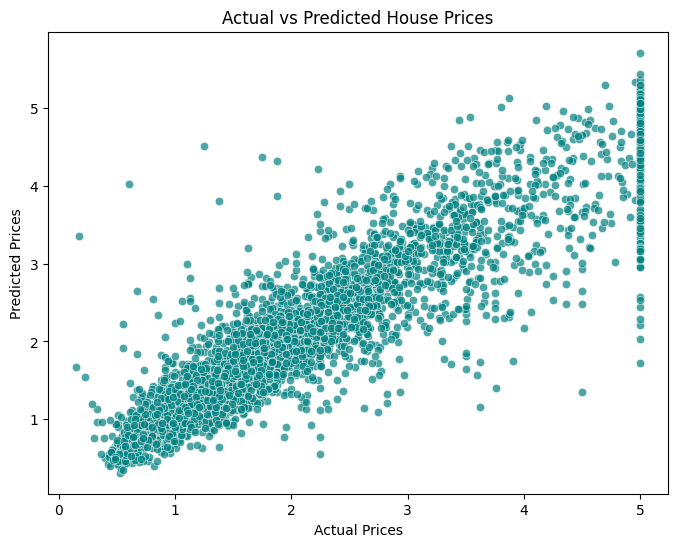

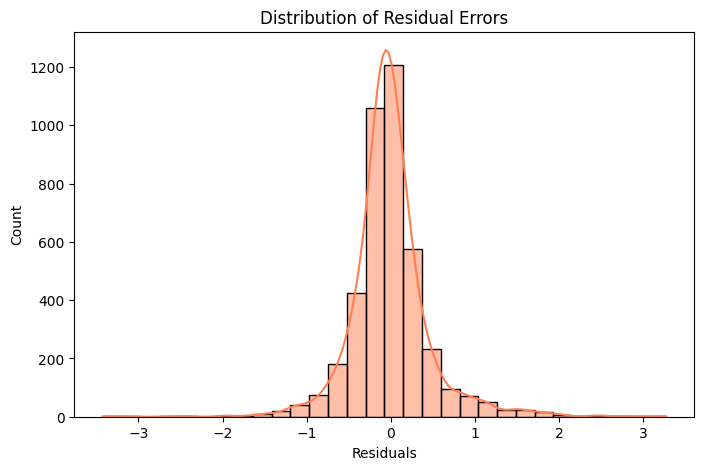

In [1]:
# California Housing Price Prediction (ML Mini Project)
# Built using XGBoost and California Housing Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn and model libraries
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

# Load dataset
housing_data = sklearn.datasets.fetch_california_housing()
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
df['Price'] = housing_data.target  # adding target column

# Initial checks
print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values in dataset:")
print(df.isnull().sum())

# Outlier visualization
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for All Features")
plt.show()

# Scaling features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Correlation heatmap
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Prepare input and output
X = df.drop(columns=['Price'])
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = XGBRegressor()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"\nAverage Cross-Validated MAE: {-cv_scores.mean():.3f}")

# Hyperparameter tuning (basic)
params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(model, param_grid=params, scoring='neg_mean_absolute_error', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters from GridSearch:")
print(grid_search.best_params_)

# Actual vs Predicted scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='teal')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# Residual histogram
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True, color='coral')
plt.xlabel("Residuals")
plt.title("Distribution of Residual Errors")
plt.show()


## ✅ Conclusion
The model built using XGBoost showed solid performance in predicting house prices based on the given features. It achieved a good R² score and low error rates after hyperparameter tuning. Further improvements could include using external location-based features or testing other ensemble models.

## 🔁 Reflection
The process helped reinforce practical skills in model evaluation, grid search, and feature scaling. Handling real-world structured data also deepened understanding of regression workflows.
